In [1]:
import os
import sys

# change working directory
current_dir = os.getcwd() 
print(f"Current Working Directory: {current_dir}")
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
os.chdir(parent_dir)
current_dir = os.getcwd()
print(f"Current Working Directory: {current_dir}")
#We need to be in the main directory that contains tests, models, etc folders

Current Working Directory: /mnt/c/Users/ASUS/OneDrive - SISSA/study/research/primordial magnetic fields/wimp annihilation PMFs/python code/githubcode/tests
Current Working Directory: /mnt/c/Users/ASUS/OneDrive - SISSA/study/research/primordial magnetic fields/wimp annihilation PMFs/python code/githubcode


In [2]:
from power_spectra import find_S0, table, F_int
from background import BIkI_fromPT, rhodm, rhob, rho_tot, Ht, alpha, photon_mfp_full, cb2_full, kdsolve, a_rec, a_eq
from PMF_perturbations import pert_sharpcut_at_rec
import matplotlib.pyplot as plt

In [ ]:
T_PT=10000
[B_K, a_I] = BIkI_fromPT(T_PT)  # B_K gives B and K as a function of scale factor

[BI,kI]= B_K(a_I)  # Get initial values of B and K at a_I

[kd, B0_ev]=kdsolve(BI, kI, F_int) #finding evolution of kd and B0

k=kI

S0=find_S0(k,kI,BI)
[a_dm_only,delta_dm_only,a_pmf,delta_dm_pmf,delta_b_pmf,theta_b_pmf,phi]=pert_sharpcut_at_rec(k,S0,kd,Ht,rhodm,rho_tot,photon_mfp_full,alpha,rhob,cb2_full,a_rec)

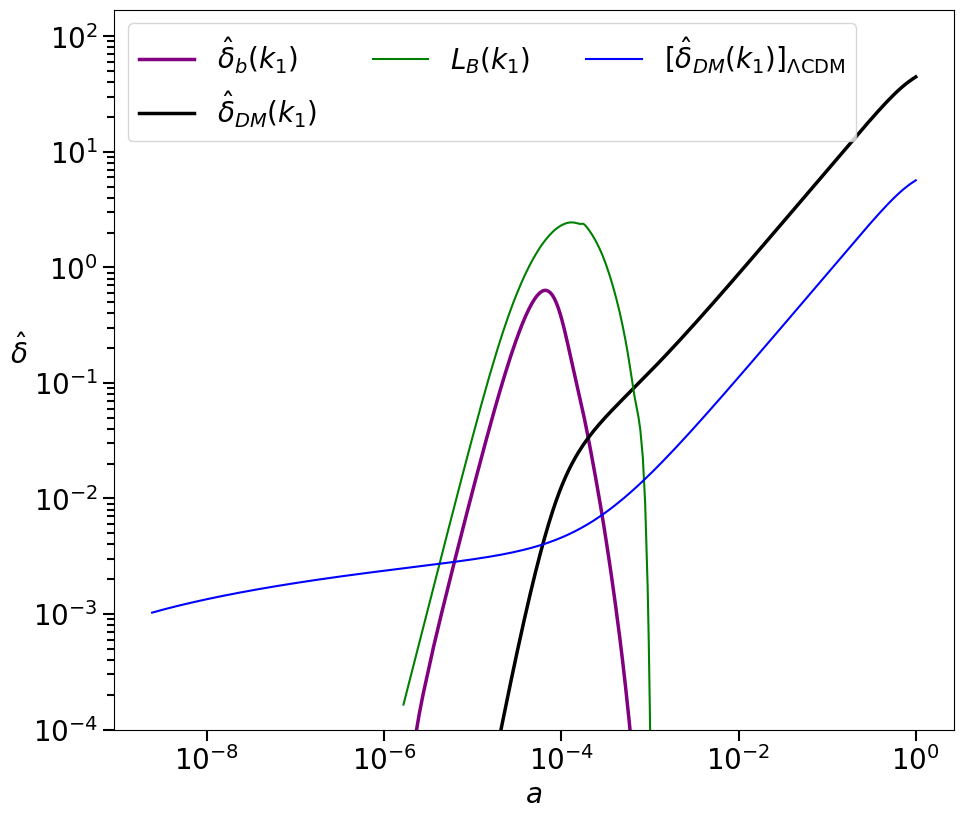

In [5]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(16,9))

maxy2 = 17 * 10**1
miny2 = 10**-4
ax.loglog(a_pmf, abs(delta_b_pmf), '-', color='purple', linewidth=2.5, label=r'$\hat{\delta}_{b}(k_1)$')
ax.loglog(a_pmf, abs(delta_dm_pmf), 'k-', linewidth=2.5, label=r'$\hat{\delta}_{DM}(k_1)$')

ax.loglog(a_pmf, abs(table(lambda a: S0(kd.sol(a)) / a**3 / Ht(a) / (Ht(a) + alpha(a)), a_pmf)), '-g', linewidth=1.5, label=r'$L_B(k_1)$')
ax.loglog(a_dm_only, abs(delta_dm_only), 'b-', linewidth=1.5, label=r'$[\hat{\delta}_{DM}(k_1)]_{\rm \Lambda CDM}$')
ax
ax.set_ylim([miny2, maxy2])
ax.set_ylabel("$\hat{\delta}$", rotation=0, labelpad=10)
ax.set_xlabel("$a$")
ax.legend(loc='upper left', ncol=3)
plt.gcf().set_size_inches(10, 8, forward=True)
plt.gcf().subplots_adjust(left=0.12, right=0.96, bottom=0.09, top=0.99)
ax.minorticks_on()
ax.tick_params(length=8, width=1.5)
ax.tick_params(which='minor', length=5, width=1.5)
# plt.savefig("delta_evolve.pdf", format="pdf", bbox_inches="tight")